In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [35]:
df = pd.read_parquet("ngao.parquet")
df


,WfeRms,SegmentWfeRms,SegmentPiston,SegmentTipTilt
0,[4.2853162085521035e-06],"[4.237633220327552e-06, 4.236435870552668e-06,...","[-3.288013750157859e-10, -2.731152110024837e-1...","[2.471015059235526e-10, 1.687848111942003e-06,..."
1,[4.2853162085521035e-06],"[4.237633220327552e-06, 4.236435870552668e-06,...","[-3.288013750157859e-10, -2.731152110024837e-1...","[2.471015059235526e-10, 1.687848111942003e-06,..."
2,[4.2853162085521035e-06],"[4.237633220327552e-06, 4.236435870552668e-06,...","[-3.288013750157859e-10, -2.731152110024837e-1...","[2.471015059235526e-10, 1.687848111942003e-06,..."
3,[4.2853162085521035e-06],"[4.237633220327552e-06, 4.236435870552668e-06,...","[-3.288013750157859e-10, -2.731152110024837e-1...","[2.471015059235526e-10, 1.687848111942003e-06,..."
4,[4.2853162085521035e-06],"[4.237633220327552e-06, 4.236435870552668e-06,...","[-3.288013750157859e-10, -2.731152110024837e-1...","[2.471015059235526e-10, 1.687848111942003e-06,..."
...,...,...,...,...
15995,[1.8461601136721129e-09],"[1.903100343980668e-09, 1.9607713230840318e-09...","[-2.932371290231828e-10, -2.9388438904653924e-...","[3.1090921503995617e-10, 8.753748420575747e-11..."
15996,[1.8461601136721129e-09],"[1.903100343980668e-09, 1.9607713230840318e-09...","[-2.932371290231828e-10, -2.9388438904653924e-...","[3.1090921503995617e-10, 8.753748420575747e-11..."
15997,[1.8461601136721129e-09],"[1.903100343980668e-09, 1.9607713230840318e-09...","[-2.932371290231828e-10, -2.9388438904653924e-...","[3.1090921503995617e-10, 8.753748420575747e-11..."
15998,[1.8461601136721129e-09],"[1.903100343980668e-09, 1.9607713230840318e-09...","[-2.932371290231828e-10, -2.9388438904653924e-...","[3.1090921503995617e-10, 8.753748420575747e-11..."


In [36]:
t = np.arange(df.shape[0])/8000
seg_piston = np.vstack(df["SegmentPiston"])*1e9
seg_tiptilt = np.vstack(df["SegmentTipTilt"])*180*3600e3/np.pi
wfe_rms = np.vstack(df["WfeRms"])*1e9
seg_wfe_rms = np.vstack(df["SegmentWfeRms"])*1e9


Text(0, 0.5, 'Segment piston [nm]')

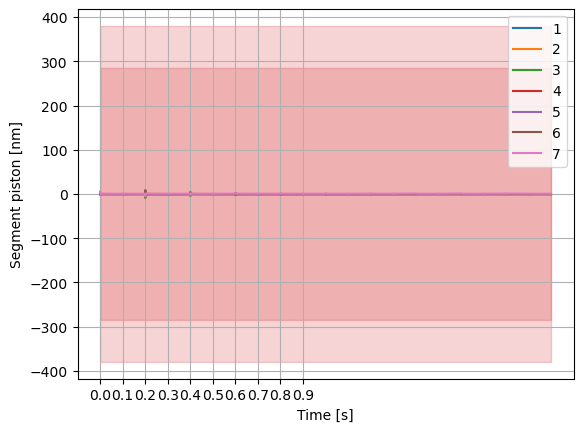

In [37]:
fig,ax = plt.subplots()
ax.plot(t,seg_piston)
ax.legend(range(1,8))
ax.fill_between(t,-380,380,color="C3",alpha=0.2)
ax.fill_between(t, -0.375 * 760, 0.375 * 760, color="C3", alpha=0.2)
ax.grid()
ax.set_xticks(np.arange(0,1,0.1))
#ax.set_yticks(np.arange(-4,5)*380)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Segment piston [nm]")

#ax.set_xlim(0, 0.2)
#ax.set_ylim(-50,50)


Text(0, 0.5, 'Segment piston [nm]')

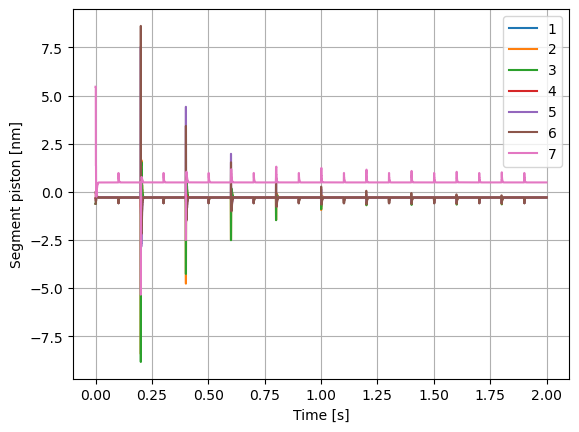

In [38]:
fig,ax = plt.subplots()
ax.plot(t,seg_piston)
ax.legend(range(1,8))
#ax.fill_between(t,-380,380,color="C3",alpha=0.2)
#ax.fill_between(t, -0.375 * 760, 0.375 * 760, color="C3", alpha=0.2)
ax.grid()
#ax.set_xticks(np.arange(0,1,0.1))
#ax.set_yticks(np.arange(-4,5)*380)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Segment piston [nm]")

#ax.set_xlim(0, 0.05)
#ax.set_ylim(-2000,2000)


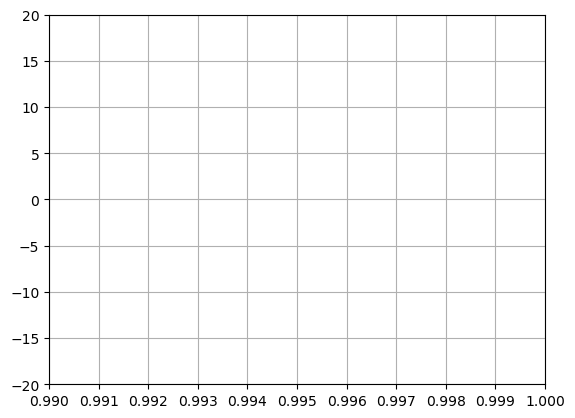

In [15]:
fig,ax = plt.subplots()
ax.plot(t,seg_piston,'.-')
ax.grid()
ax.set_xlim(1-0.01,1)
ax.set_ylim(-20,20)
ax.set_xticks(np.arange(0.99,1,1e-3));

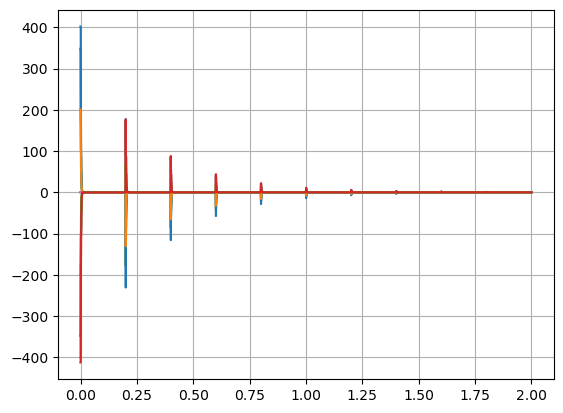

In [39]:
fig,ax = plt.subplots()
ax.plot(t,seg_tiptilt,'-')
ax.grid()
#ax.set_xlim([0,0.1])

Text(0, 0.5, 'Segment Wfe RMS [nm]')

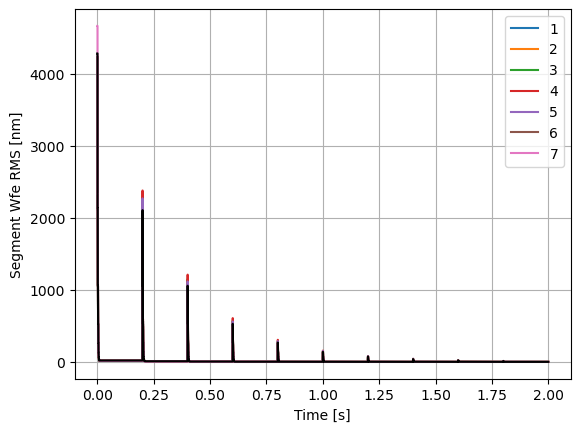

In [40]:
fig, ax = plt.subplots()
ax.plot(t, seg_wfe_rms)
ax.legend(range(1, 8))
ax.plot(t, wfe_rms,"k")
ax.grid()
ax.set_xlabel("Time [s]")
ax.set_ylabel("Segment Wfe RMS [nm]")
#ax.set_ylim([0,50])
#ax.set_xticks(np.arange(0,1,0.1));

In [41]:
df = pd.read_parquet("agws.parquet")
df


,WfeRms,SegmentWfeRms,SegmentPiston,SegmentTipTilt
0,"[4.592486675392138e-06, 4.607469236361794e-06,...","[4.177836217422737e-06, 3.330142590129981e-06,...","[2.453139359204215e-06, -1.1891407893926953e-0...","[-4.665851065510651e-07, 1.4180708376443363e-0..."
1,"[4.592486675392138e-06, 4.607469236361794e-06,...","[4.177836217422737e-06, 3.330142590129981e-06,...","[2.453139359204215e-06, -1.1891407893926953e-0...","[-4.665851065510651e-07, 1.4180708376443363e-0..."
2,"[4.592486675392138e-06, 4.607469236361794e-06,...","[4.177836217422737e-06, 3.330142590129981e-06,...","[2.453139359204215e-06, -1.1891407893926953e-0...","[-4.665851065510651e-07, 1.4180708376443363e-0..."
3,"[4.592486675392138e-06, 4.607469236361794e-06,...","[4.177836217422737e-06, 3.330142590129981e-06,...","[2.453139359204215e-06, -1.1891407893926953e-0...","[-4.665851065510651e-07, 1.4180708376443363e-0..."
4,"[4.592486675392138e-06, 4.607469236361794e-06,...","[4.177836217422737e-06, 3.330142590129981e-06,...","[2.453139359204215e-06, -1.1891407893926953e-0...","[-4.665851065510651e-07, 1.4180708376443363e-0..."
...,...,...,...,...
15998,"[1.8597556845634244e-06, 1.8598304905026453e-0...","[1.0534407692830428e-06, 1.1389739711376023e-0...","[2.2372557850758312e-06, -1.2854902706749272e-...","[-5.123782216287509e-07, -2.516125334750541e-0..."
15999,"[1.8597556845634244e-06, 1.8598304905026453e-0...","[1.0534407692830428e-06, 1.1389739711376023e-0...","[2.2372557850758312e-06, -1.2854902706749272e-...","[-5.123782216287509e-07, -2.516125334750541e-0..."
16000,"[1.8598651649881504e-06, 1.8597286270960467e-0...","[1.0549093758527306e-06, 1.1424468766563223e-0...","[2.2369792986864923e-06, -1.2857204865213134e-...","[-5.127022859596764e-07, -2.538168359933479e-0..."
16001,"[1.8598651649881504e-06, 1.8597286270960467e-0...","[1.0549093758527306e-06, 1.1424468766563223e-0...","[2.2369792986864923e-06, -1.2857204865213134e-...","[-5.127022859596764e-07, -2.538168359933479e-0..."


In [42]:
agws_gs = np.load("AGWS_GS_wavefronts-at-rest.pkl",allow_pickle=True)
agws_gs.keys()

dict_keys(['segment_piston', 'segment_tiptilt'])

In [43]:
t = np.arange(df.shape[0])/8000
seg_piston = np.vstack(df["SegmentPiston"])*1e9
seg_tiptilt = np.vstack(df["SegmentTipTilt"])*180*3600e3/np.pi

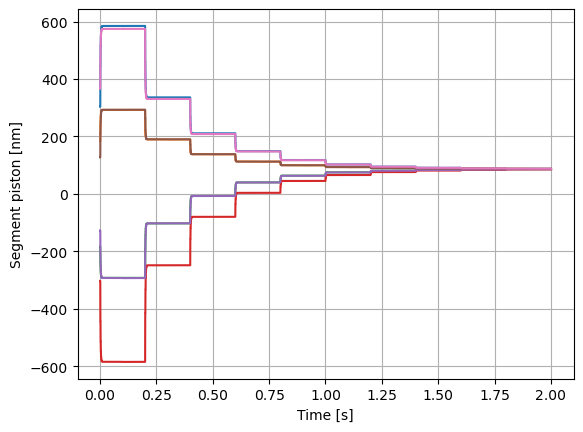

In [44]:
ref = np.asarray(agws_gs["segment_piston"][:7])*1e9
fig, ax = plt.subplots()
#ax.plot([t[-1]]*7, np.asarray(agws_gs["segment_piston"][:7])*1e9,'ko');
ax.plot(t, seg_piston[:,:7]-ref[None,:]);
ax.set_xlabel("Time [s]")
ax.set_ylabel("Segment piston [nm]")
#ax.set_xlim(0, 0.05)
ax.grid()


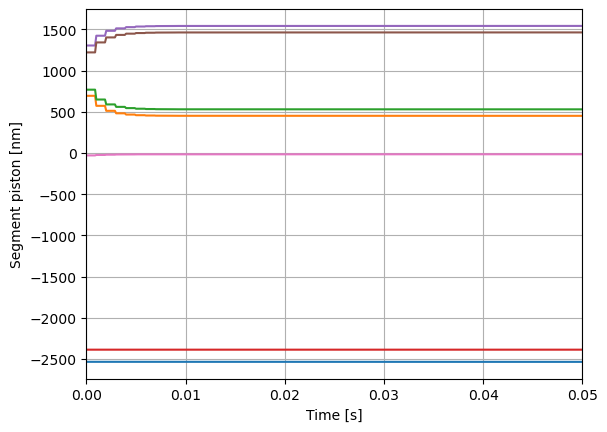

In [121]:
fig, ax = plt.subplots()
ax.plot(t, seg_piston[:, 7:14])
ax.set_xlabel("Time [s]")
ax.set_ylabel("Segment piston [nm]")
ax.set_xlim(0, 0.05)
ax.grid()


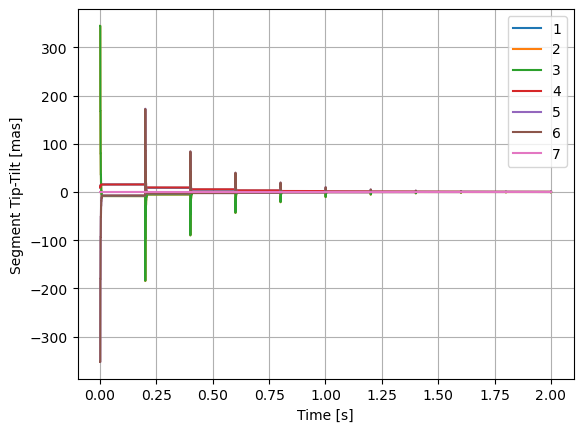

In [45]:
ref = np.asarray(agws_gs["segment_tiptilt"][:7])*180*3600e3/np.pi
fig, ax = plt.subplots()
#ax.plot([t[-1]]*7, np.asarray(agws_gs["segment_tiptilt"][:7])*180*3600e3/np.pi,'ko');
ax.plot(t, seg_tiptilt[:, :7] - ref[None,:])
ax.set_xlabel("Time [s]")
ax.set_ylabel("Segment Tip-Tilt [mas]")
#ax.set_xlim(0, 0.05)
ax.grid()
ax.legend(list(range(1,8)))


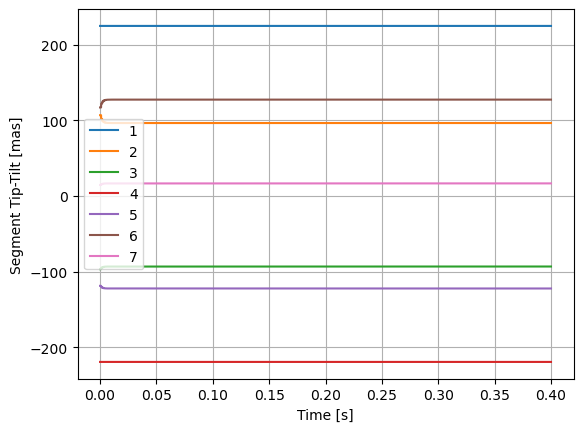

In [9]:
ref = np.asarray(agws_gs["segment_tiptilt"][:7])*180*3600e3/np.pi
fig, ax = plt.subplots()
#ax.plot([t[-1]]*7, np.asarray(agws_gs["segment_tiptilt"][:7])*180*3600e3/np.pi,'ko');
ax.plot(t, seg_tiptilt[:, 7:14] - ref[None,:])
ax.set_xlabel("Time [s]")
ax.set_ylabel("Segment Tip-Tilt [mas]")
#ax.set_xlim(0, 0.05)
ax.grid()
ax.legend(list(range(1,8)))


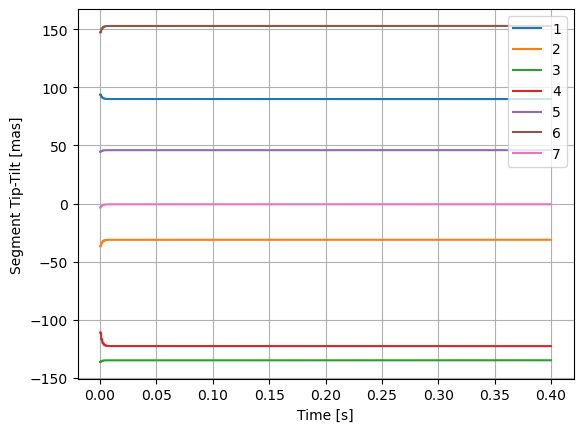

In [72]:
ref = np.asarray(agws_gs["segment_tiptilt"][:7])*180*3600e3/np.pi
fig, ax = plt.subplots()
#ax.plot([t[-1]]*7, np.asarray(agws_gs["segment_tiptilt"][:7])*180*3600e3/np.pi,'ko');
ax.plot(t, seg_tiptilt[:, -7:] - ref[None,:])
ax.set_xlabel("Time [s]")
ax.set_ylabel("Segment Tip-Tilt [mas]")
#ax.set_xlim(0, 0.05)
ax.grid()
ax.legend(list(range(1,8)))


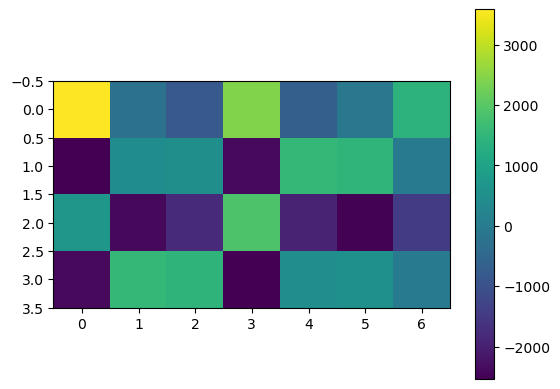

In [60]:
fig,ax = plt.subplots()
h = ax.imshow(seg_piston[-1,:].reshape(-1,7))
fig.colorbar(h,ax=ax)


In [61]:
seg_piston[-1,:]

array([ 3584.844535  ,  -238.49449349,  -823.51056108,  2415.45831159,
        -677.11170004,   -92.6675483 ,  1414.72003179, -2535.95067079,
         442.16776018,   522.39880688, -2387.72827288,  1550.28089921,
        1472.81696172,   -16.5174221 ,   713.96010526, -2394.61951423,
       -1810.17230716,  1883.36832707, -1922.32823792, -2507.31022788,
       -1444.11387737, -2387.6727937 ,  1535.11609824,  1454.86410474,
       -2536.14030044,   460.10819688,   537.45338846,   -16.1462026 ])

In [62]:
print(np.array_str(seg_piston[-1,:].reshape(-1,7),precision=0))

[[ 3585.  -238.  -824.  2415.  -677.   -93.  1415.]
 [-2536.   442.   522. -2388.  1550.  1473.   -17.]
 [  714. -2395. -1810.  1883. -1922. -2507. -1444.]
 [-2388.  1535.  1455. -2536.   460.   537.   -16.]]


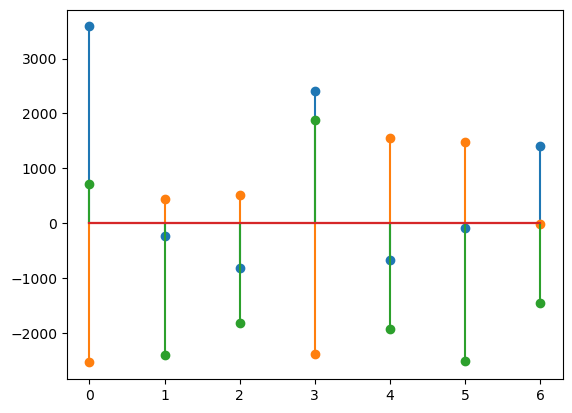

In [63]:
fig,ax = plt.subplots()
h = ax.stem(seg_piston[-1,:].reshape(-1,7)[0,:])
h = ax.stem(seg_piston[-1,:].reshape(-1,7)[1,:],linefmt='C1',markerfmt='oC1')
h = ax.stem(seg_piston[-1,:].reshape(-1,7)[2,:],linefmt='C2',markerfmt='oC2')

In [64]:
[(np.cos(2*np.pi*i/3),np.sin(2*np.pi*i/3)) for i in range(3)]

[(1.0, 0.0),
 (-0.4999999999999998, 0.8660254037844387),
 (-0.5000000000000004, -0.8660254037844384)]

In [65]:
554/2

277.0

In [66]:
297*2

594

In [67]:
df = pd.read_parquet("sh48.parquet")
sh48 = np.vstack(df["SensorData"])

df


,SensorData
0,"[-2.7943372e-09, -7.5559996e-08, -3.0719377e-0..."
1,"[-3.2108005e-09, -2.3832971e-09, -3.4137457e-0..."
2,"[-3.4057166e-09, -1.0514434e-09, -3.6360973e-0..."
3,"[-3.6200731e-09, -9.2844576e-10, -3.8643407e-0..."
4,"[-3.835652e-09, -7.3279605e-10, -4.0960515e-08..."
5,"[-4.0558064e-09, -4.8772986e-10, -4.3301128e-0..."
6,"[-4.2746535e-09, -2.1851676e-10, -4.5645265e-0..."
7,"[-4.4978776e-09, 6.265566e-11, -4.7995485e-08,..."
8,"[-4.71789e-09, 3.5020964e-10, -5.0346898e-08, ..."
9,"[-4.9352877e-09, 6.4033134e-10, -5.2698056e-08..."


In [68]:
m1_rbm = np.vstack(df["M1RigidBodyMotions"])
t = np.arange(df.shape[0])/8000


KeyError: 'M1RigidBodyMotions'

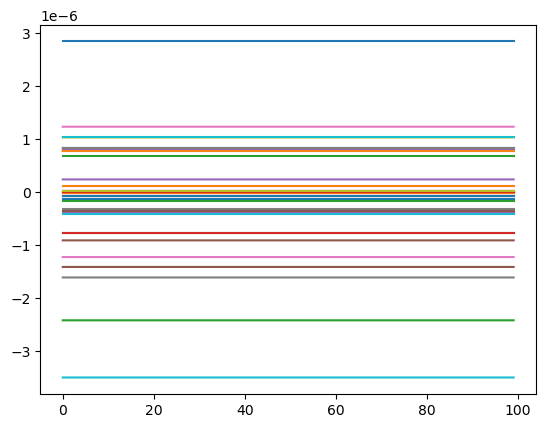

In [ ]:
fig,ax = plt.subplots()
ax.plot(m1_rbm[-100:,:]);
#ax.set_xlim(0.5-np.asanyarray([0,0.01]))

In [ ]:
m1_rbm[-1,:]

array([-1.36185491e-07,  1.16674180e-07, -7.75110720e-07, -2.04024957e-08,
        7.77764228e-07, -1.40857480e-06,  2.58480455e-08, -3.17743968e-07,
        1.03300624e-06,  9.64263602e-09,  8.34795117e-07,  2.96864719e-08,
       -1.57054075e-07, -7.82243958e-08,  2.41126600e-07, -1.32311078e-08,
        8.24055121e-07, -1.60679440e-06, -6.82698200e-08, -4.08071145e-07,
        2.84095790e-06, -2.05375201e-08,  6.87396039e-07, -7.78089202e-07,
       -3.68751557e-07, -3.62996758e-07,  1.23424547e-06,  1.53124180e-08,
        7.74313662e-07, -3.49182983e-06, -7.94683643e-08,  7.79735387e-07,
       -2.41434486e-06,  1.24831034e-08,  8.07299216e-07, -9.07589310e-07,
       -1.22255142e-06,  8.33063041e-07,  2.22283028e-08,  1.03309083e-06])

In [ ]:
df = pd.read_parquet("dfs.parquet")
df


,SensorData
0,"[1.1976294e-07, 2.673487e-07, 5.735968e-07, 7...."
1,"[1.1976294e-07, 2.673487e-07, 5.735968e-07, 7...."
2,"[1.1976294e-07, 2.673487e-07, 5.735968e-07, 7...."
3,"[1.1976294e-07, 2.673487e-07, 5.735968e-07, 7...."
4,"[1.1976294e-07, 2.673488e-07, 5.735968e-07, 7...."
...,...
3995,"[-1.6583272e-08, 2.7494661e-07, 8.587309e-07, ..."
3996,"[-1.6583272e-08, 2.7494661e-07, 8.5873114e-07,..."
3997,"[-1.6583499e-08, 2.7494661e-07, 8.5873137e-07,..."
3998,"[-1.6583726e-08, 2.7494661e-07, 8.587318e-07, ..."


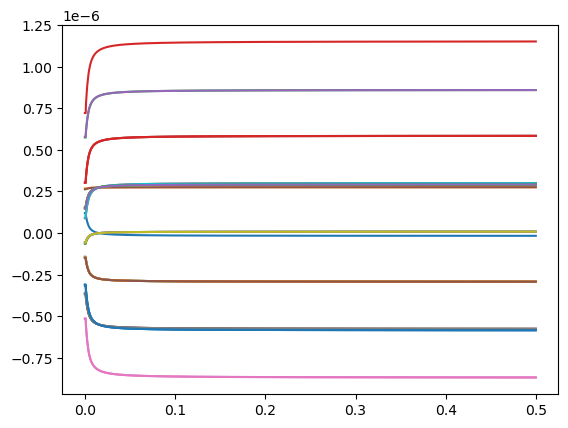

In [ ]:
dfs = np.vstack(df["SensorData"])
t = np.arange(df.shape[0])/8000
fig, ax = plt.subplots()
ax.plot(t,dfs);


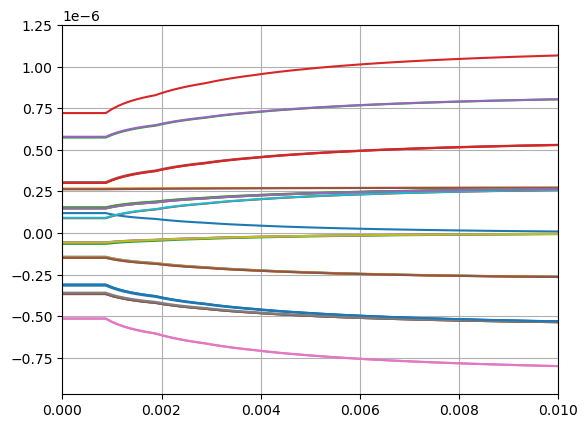

In [ ]:
fig, ax = plt.subplots()
ax.plot(t,dfs)
ax.set_xlim([0,0.01])
ax.grid()

(0.5, 0.499)

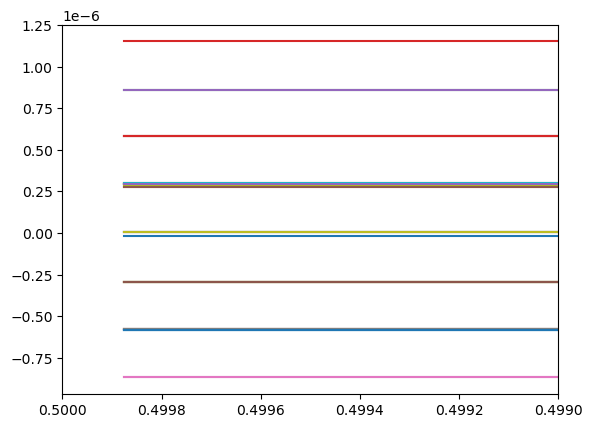

In [ ]:
fig, ax = plt.subplots()
ax.plot(t,dfs)
ax.set_xlim(0.5-np.asanyarray([0,0.001]))

In [ ]:
dfs

array([[ 1.1976294e-07,  2.6734870e-07,  5.7359682e-07, ...,
         3.0106366e-07,  1.4859484e-07, -1.4876355e-07],
       [ 1.1976294e-07,  2.6734870e-07,  5.7359682e-07, ...,
         3.0106366e-07,  1.4859484e-07, -1.4876355e-07],
       [ 1.1976294e-07,  2.6734870e-07,  5.7359682e-07, ...,
         3.0106366e-07,  1.4859484e-07, -1.4876355e-07],
       ...,
       [-1.6580998e-08,  2.7494627e-07,  8.5872568e-07, ...,
         5.8337901e-07,  2.9166381e-07, -2.9201033e-07],
       [-1.6581225e-08,  2.7494627e-07,  8.5872591e-07, ...,
         5.8337929e-07,  2.9166404e-07, -2.9201055e-07],
       [-1.6581453e-08,  2.7494627e-07,  8.5872614e-07, ...,
         5.8337952e-07,  2.9166426e-07, -2.9201055e-07]], dtype=float32)

In [ ]:
from scipy.io import loadmat
data = loadmat("active-optics_calibrations.mat")
D_dfs = data["dfs_rbm1"]


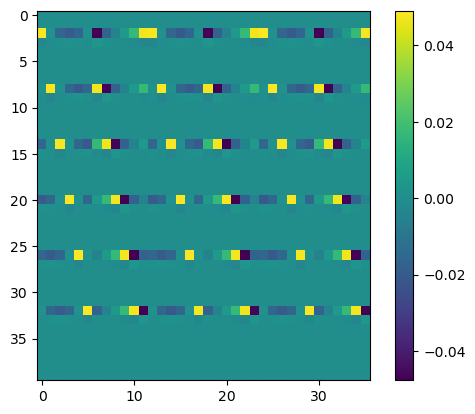

In [ ]:
(u,s,vt) = np.linalg.svd(D_dfs)
M = np.linalg.pinv(D_dfs,s[17])
plt.imshow(M)
plt.colorbar()

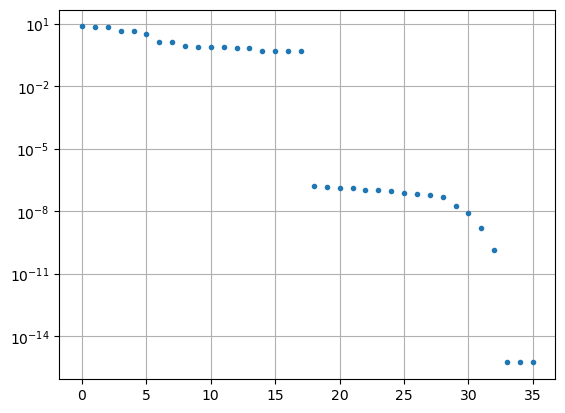

In [ ]:
plt.semilogy(s,'.')
plt.grid()

In [ ]:
rbm = M@dfs[-1,:]
rbm*1e9

array([ 1.1009572e-05,  1.5144136e-05,  5.3645978e-03, -3.1724622e-04,
        4.1145863e-04, -5.6848785e-07,  3.0067677e-05, -1.9422034e-03,
       -6.8506664e-01,  4.0550508e-02,  1.1271744e-03, -5.6496419e-06,
       -2.7533477e-05, -1.7338856e-03, -6.1186254e-01,  3.6232267e-02,
       -1.0569384e-03,  4.7363778e-06, -1.0724223e-05,  9.7984121e-05,
        3.4745540e-02, -2.0439206e-03, -4.0699105e-04,  6.9492614e-07,
        2.6838883e-05,  1.8132440e-03,  6.3974249e-01, -3.7895575e-02,
        8.7935559e-04, -1.7443119e-06, -2.4630092e-05,  1.7486672e-03,
        6.1709392e-01, -3.6553647e-02, -8.2118687e-04,  1.5661470e-06,
        3.3936882e-05,  1.2077877e-06, -4.3755797e-05,  1.2303023e-03],
      dtype=float32)

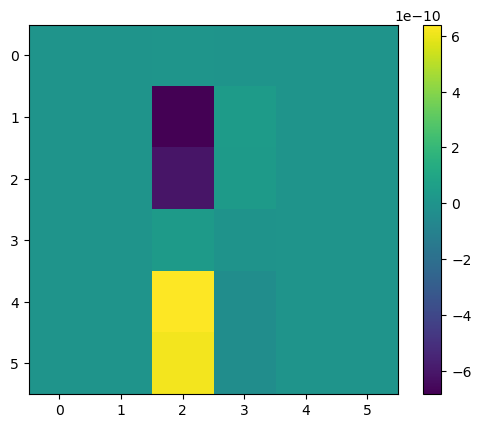

In [ ]:
plt.imshow(rbm[:36].reshape(6,6))
plt.colorbar()

In [ ]:
from scipy.linalg import block_diag
D_sh48 = block_diag(*[data[f"sh48_rbm{i}"] for i in range(1,8)])

In [ ]:
np.linalg.norm(D_sh48),np.linalg.norm(D_dfs)

(1.9310678, 14.515751)

In [ ]:
D_aco = np.vstack([D_dfs/np.linalg.norm(D_dfs), D_sh48/np.linalg.norm(D_sh48)])


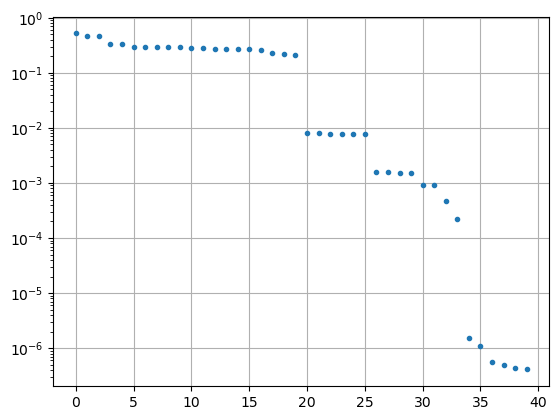

In [ ]:
(u, s, vt) = np.linalg.svd(D_aco)
plt.semilogy(s, '.')
plt.grid()


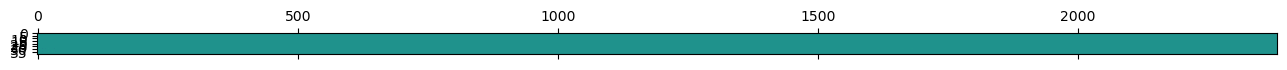

In [ ]:
R_aco = np.linalg.pinv(D_aco, s[-6])
plt.matshow(R_aco)
#plt.colorbar()


In [ ]:
s = np.hstack([dfs[-1,:],sh48[-1,:]])
rbm = R_aco@s
rbm*1e9


array([-1.1854740e+07, -8.2287930e+04,  4.0421070e+01, -2.1969817e+03,
        3.2182022e+05,  1.3202514e+06, -5.1266544e+05,  1.3303084e+04,
       -2.8705075e+00,  5.0634192e+02,  1.5811228e+04,  4.6257379e+04,
        6.0534862e+05, -1.1676031e+04,  2.2875198e+01, -1.4223428e+02,
       -1.4225576e+04, -7.9237508e+04,  5.1715935e+06,  7.5717844e+04,
       -1.3173030e+02,  1.8713990e+03, -1.3761377e+05, -5.7634819e+05,
       -4.3966819e+08, -2.7607326e+04,  2.3176030e+03, -5.1359393e+02,
        1.1872964e+07,  4.9068740e+07,  1.5586086e+08,  2.4743143e+04,
        6.3278717e+02,  5.1919891e+02, -4.2063155e+06, -1.7383414e+07,
        1.1310995e+05, -2.6902314e+04, -7.0965552e+02,  1.3710044e+03],
      dtype=float32)

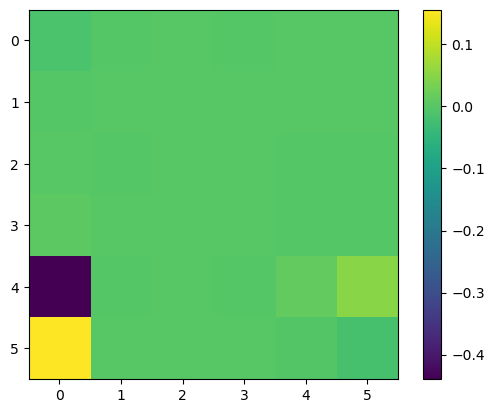

In [ ]:
plt.imshow(rbm[:36].reshape(6, 6))
plt.colorbar()
